In [1]:
# import libraries
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Epidemics on Networks - specialized module
!pip install EoN

In [3]:
dataframe = pd.read_csv("M1Anonymized.csv", header=None, names = ["from","to"])
#dataframe

In [4]:
G = nx.from_pandas_edgelist(dataframe, source = 'from', target = 'to')

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1429
Number of edges: 19357
Average degree:  27.0917


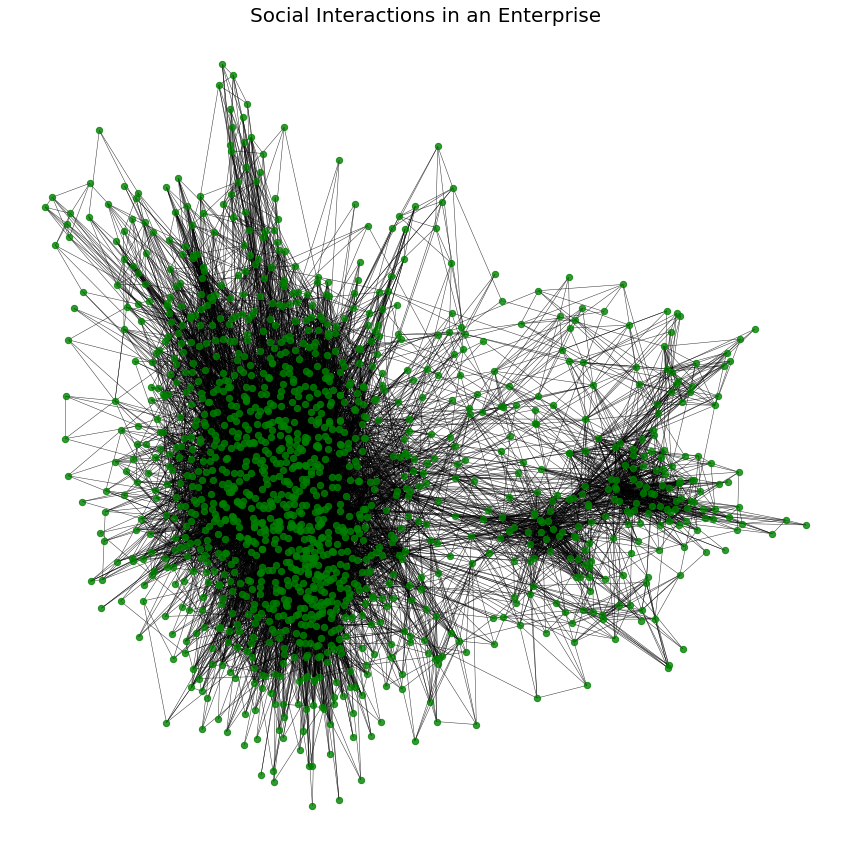

In [6]:
# Making a first visualization of the network
plt.figure(figsize = (15, 15))
plt.axis('off')
plt.title('Social Interactions in an Enterprise', size = 20)
nx.draw_networkx(G, with_labels = False, node_size = 40, alpha = 0.8, width = 0.5, node_color = 'green', cmap=plt.cm.Accent)

#plt.savefig("Image of Network.png")

## Degree Distribution

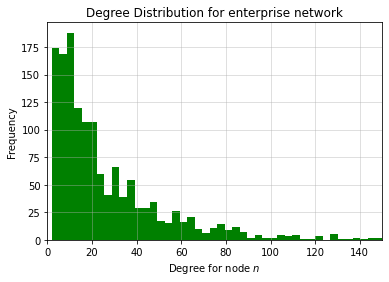

In [7]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins = 100, facecolor = 'g', histtype = 'stepfilled')
plt.title("Degree Distribution for enterprise network")
plt.ylabel("Frequency")
plt.xlabel("Degree for node $n$")

plt.xlim(right = 150, left = 0)

plt.grid(True, alpha = 0.5)

#plt.savefig("Degree Distributionnn11.png")
plt.show()

In [8]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)
sorted(degree_centrality, key = degree_centrality.get, reverse=True)[:10]

[438, 137, 489, 371, 487, 547, 640, 100, 1004, 877]

In [9]:
# Density of the network
nx.density(G)

0.01897175945255639

In [10]:
# Average path lenght
nx.average_shortest_path_length(G)

3.036131317467505

In [11]:
# Clustering coefficient
nx.average_clustering(G)

0.42115170748523817

# Modelo SIR

In [12]:
# module used for parameter estimation and plotting
import EoN

In [13]:
tmax = 20
iterations = 5  #run 5 simulations
tau = 0.1           #transmission rate
gamma = 1.0    #recovery rate
rho = 0.005      #random fraction initially infected

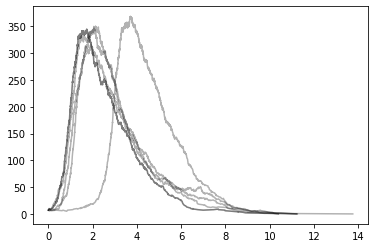

In [14]:
for counter in range(iterations): #run simulations
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

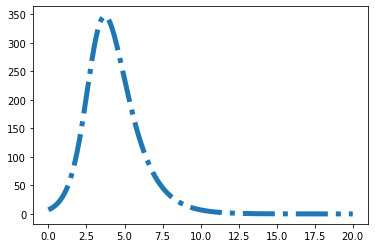

In [15]:
#Now compare with ODE predictions.  Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.

#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I, R = EoN.SIR_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

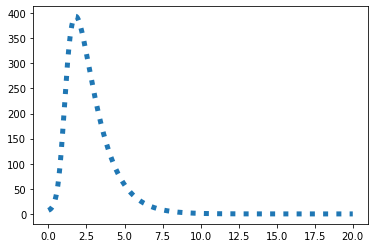

In [16]:
#meanfield models will generally overestimate SIR growth because they
#treat partnerships as constantly changing.
t, S, I, R = EoN.SIR_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

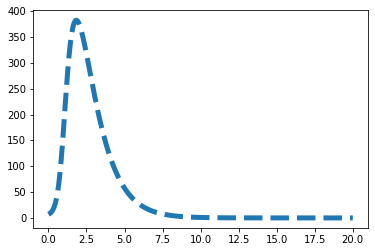

In [17]:
#The EBCM model does not account for degree correlations or clustering
t, S, I, R = EoN.EBCM_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '--', label = 'EBCM approximation', linewidth = 5)

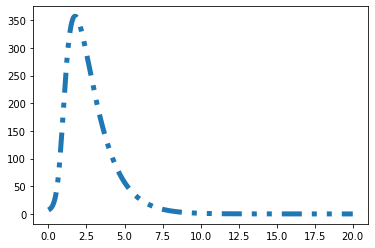

In [18]:
#the preferential mixing model captures degree correlations.
t, S, I, R = EoN.EBCM_pref_mix_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, label = 'Pref mix EBCM', linewidth=5, dashes=[4, 2, 1, 2, 1, 2])

# Using EoN to model an epidemic following Covid 19 parameters

### Paramater initialization

In [19]:
# Calculating miu
m = np.divide(180563688,200304173)
m

0.901447460108582

In [20]:
# R0
R0 = 2.5

In [21]:
# Computing tau
denominador = np.multiply(m , R0 - 1)
tau = np.divide(1, denominador)
tau = 2.5

In [22]:
# Beta: likelihood that the disease will be transmitted from an infected to a susceptible individual in a unit time
numerador = np.multiply(m,R0)
beta = np.divide(numerador, 27) # 27 is the average degree
beta

0.0834673574174613

In [23]:
# Rho (was provided in a paper)
rho = 0.61 

In [24]:
iterations = 5  #run 5 simulations

In [25]:
# Fast SIR implementation 
simulationOne = EoN.fast_SIR(G,tau = tau, gamma = m, rho = rho, return_full_data = True)

MovieWriter stderr:
[gif @ 0x55ea28e82600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: ignored

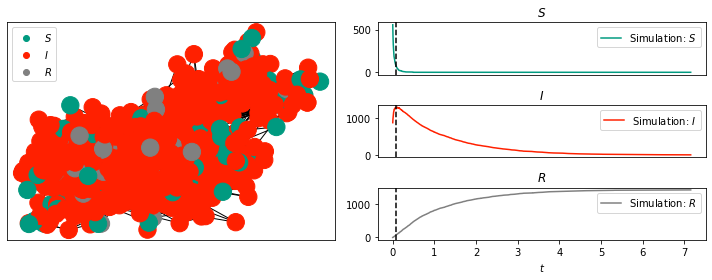

In [26]:
# Create an animation
# Go to the end of the output to see non-animated results
animationOne = simulationOne.animate()
animationOne.save('animationOne.gif')